In [4]:
from raster_functions import hexagonal_tesselation, mean_aggregation, mean_aggregation_plot
import rasterio
import geopandas as gpd
from geopandas import GeoSeries
import matplotlib.pyplot as plt
import h3
from shapely.geometry import Polygon
from rasterstats import zonal_stats
import pandas as pd
import fiona

#### Function 1: Hexagonal Tesselation Generation

<Axes: >

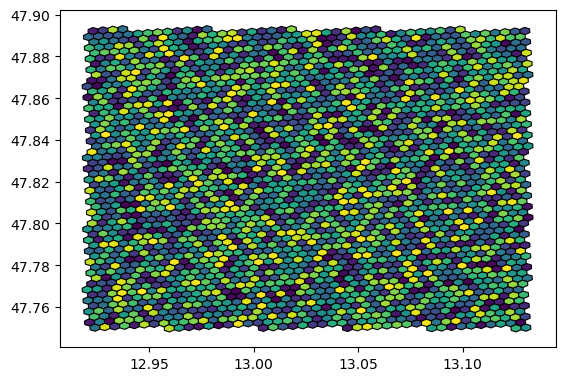

In [39]:
# Define the file path to the input GeoJSON representing the AOI
input_geojson = r"AOI.geojson"

# Define the output file name for the hexagonal tessellation GeoJSON
hexagon_output = r"Salzburg_City_Hexagons_L8"

# Generate the hexagonal tessellation with resolution level 9, using EPSG:3857 CRS, and save it as a GeoJSON file
hexagonal_tesselation(input_geojson, 9, "EPSG:3857", hexagon_output)

# Read the generated hexagonal tessellation GeoJSON file into a GeoDataFrame
level_8_Hexagons = gpd.read_file("Salzburg_City_Hexagons_L8.geojson")

# Plot the hexagonal tessellation using the 'viridis' colormap, with a line width of 0.8 and black edge color, and show the legend
level_8_Hexagons.plot(cmap='viridis', linewidth=0.8, edgecolor='black', legend=True)



#### Function 2: Hexagonal Tesselation Generation with Mean Aggregation

In [40]:
# Define the file paths for the input raster and the input GeoJSON representing the AOI
input_raster = r"Landsat8_2018-08-01.tif"
input_geojson = r"AOI.geojson"

# Perform mean aggregation of the raster values within the hexagonal tessellation
# generated from the AOI at resolution level 9, using EPSG:4326 CRS,
# and save the result as a GeoJSON file
mean_aggregation(input_geojson, input_raster, 9, "EPSG:4326", "Salzburg_Mean_Temperature_Hexagons_L8")


#### Function 3: PNG generation

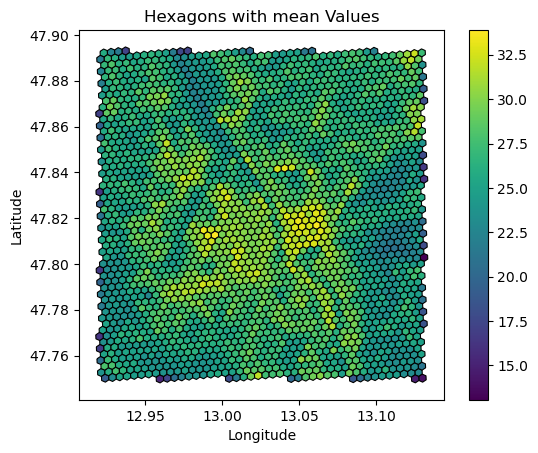

In [41]:
# Define the file path for the input aggregated GeoJSON file
input_aggregated_geojson = r"Salzburg_Mean_Temperature_Hexagons_L8.geojson"

# Generate a plot of the mean temperature values from the aggregated GeoJSON data
# using the 'mean' statistic, colormap 'viridis', and save the plot as an image file
mean_aggregation_plot(input_aggregated_geojson, "mean", 'viridis', "Mean_Temperature_Plot_L8_Salzburg")
